# Video walkthrough

link: https://youtu.be/W0YObY4ES6E 
Paper: The Response of Glaciers and Ice-Sheets to Seasonal and Climatic Changes

# Introduction

The main theme is the modeling of glacier dynamics. Our model analyzes the flow dynamics of glacier ice using a first-order wave equation. We examine how ice flow evolves over time under constant accumulation rates and varying initial conditions. 

It is important to understand glacier behavior as it helps predict ice loss, sea-level rise, and climate change impacts. With global temperatures rising day by day, glaciers are increasingly at risk of losing mass. This loss can have significant consequences mostly in coastal areas, where rising sea levels threaten ecosystems and human lives. Understanding these dynamics is essential for handling challenges.

Licciulli and colleagues (2019) used the Full Stokes model to model ice flow. The Full Stokes model for ice flow includes the Stokes equation (for momentum balance), the continuity equation (for mass conservation), and the temperature equation (for internal energy conservation). This model includes all forces acting within the ice, including vertical stresses and temperature effects. The results from this model are more accurate as it uses three equations with more parameters and variables. 

# Equations

The fundamental processes in glacier dynamics include accumulation (gain of mass through snowfall), ablation (loss of mass via melting), ice flow, and climate-related changes. 

The main equation is the kinematic wave equation which is given by:
$$\frac{\partial q}{\partial x} + \frac{1}{c} \frac{\partial q}{\partial t} = a(x,t)$$

Where $q$ is the flow, or the volume of ice, per unit width, that is passing a single point in time, $a(x,t)$ is the rate of accumulation at the surface of the glacier, and $c$ is the the velocity of the 'wave' moving through the glacier. We assumed that $q$ is a function of $x$ and $t$. This equation was derived from this equation: $\frac{\partial q}{\partial x} + \frac{\partial h}{\partial t} = a$; where $h$ is the thickness of ice.

In this problem, we used Dirichlet boundary conditions to keep our problem simple. We assumed that there was no flow at boundary conditions. We used two initial conditions to see how flow behaves in different situations. For the first one, we used $ q(t=0,x) = e^{-x}$ . For the second one, we used $q(t=0,x) = sin(\frac{2 *pi * x}{L})$, as we are working with a wave equation. In both cases, we kept the accumulation rate constant. For the parameters, we chose glacier length as 1000 km, a total of 100 days, and wave velocity as 1 km/day. 

# Numerical Methods

We used the Forward Euler upwind scheme to solve our equation. The kinematic equation is a first-order differential equation, and the forward Euler method is the simplest way to slove this type of equation. 

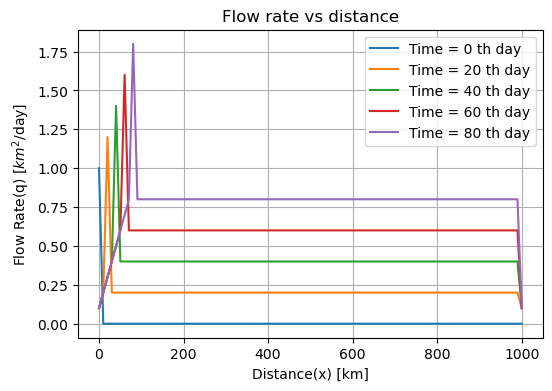

In [50]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

L = 1000  # Glacier length (kilometers)
T = 100  # Total simulation time (days)
dx = 10  # Spatial step (kilometers)
dt = 10  # Time step (days)
c = 1   # wave velocity (km/day)

nx = int(L / dx)  
nt = int(T / dt)
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)
# Accumulation
def a(x, t):
    return .01
# Initial and boundary conditions
q = np.zeros((nt, nx))
q[0, :] = np.exp(-x)  # Initial condition
# Advection matrix
Cr = c * dt / dx 
data = np.array([Cr * np.ones(nx), (1 - Cr) * np.ones(nx)])
diags = np.array([-1, 0])
M = spdiags(data, diags, nx, nx).toarray()
# Boundary conditions
M[0, 0] = 0  # Left boundary condition
M[-1, -1] = 0  # Right boundary condition
M[-1, -2] = 0  # Right boundary condition (no flux)
#loop
for n in range(1, nt):
    C = q[n-1, :]
    Cnew = np.matmul(M, C)
    Cnew += dt * a(x, t[n])
    q[n, :] = Cnew
# Plot
plt.figure(figsize=(6, 4))
for n in range(0, nt, nt // 5):
    plt.plot(x, q[n, :], label=f'Time = {n * dt} th day')
plt.xlabel('Distance(x) [km]')
plt.ylabel('Flow Rate(q) [$km^2$/day]')
plt.title('Flow rate vs distance')
plt.legend()
plt.grid()
plt.show()

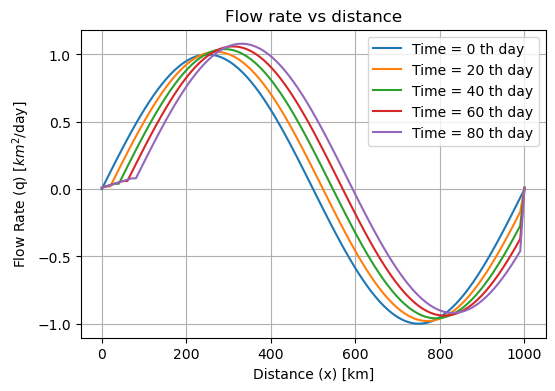

In [53]:
import numpy as np
from scipy.sparse import spdiags
import matplotlib.pyplot as plt

L = 1000 # Glacier length (meters)
T = 100  # Total simulation time (seconds)
dx = 10  # Spatial step (meters)
dt = 10  # Time step (seconds)
c = 1   # wave velocity

nx = int(L / dx)  
nt = int(T / dt)
x = np.linspace(0, L, nx)
t = np.linspace(0, T, nt)
# Accumulation
def a(x, t):
    return .001
# Initial and boundary conditions
q = np.zeros((nt, nx))
q[0, :] = np.sin(2 * np.pi * x / L)  # Initial condition
# Advection matrix
Cr = c * dt / dx   
data = np.array([Cr * np.ones(nx), (1 - Cr) * np.ones(nx)])
diags = np.array([-1, 0])
M = spdiags(data, diags, nx, nx).toarray()
# Boundary conditions
M[0, 0] = 0  # Left boundary condition
M[-1, -1] = 0  # Right boundary condition
M[-1, -2] = 0  # Right boundary condition (no flux)
#loop
for n in range(1, nt):
    C = q[n-1, :]
    Cnew = np.matmul(M, C)
    Cnew += dt * a(x, t[n])
    q[n, :] = Cnew
# Plot
plt.figure(figsize=(6, 4))
for n in range(0, nt, nt // 5):
    plt.plot(x, q[n, :], label=f'Time = {n * dt} th day')
plt.xlabel('Distance (x) [km]')
plt.ylabel('Flow Rate (q) [$km^2$/day]')
plt.title('Flow rate vs distance')
plt.legend()
plt.grid()
plt.show()

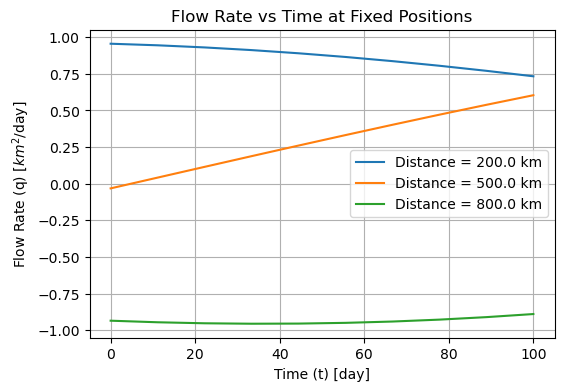

In [54]:
plt.figure(figsize=(6, 4))
for x in [0.2, 0.5, 0.8]:
    space_index = int(x * nx)
    plt.plot(t, q[:, space_index], label=f"Distance = {x * L} km")

plt.title("Flow Rate vs Time at Fixed Positions")
plt.xlabel("Time (t) [day]")
plt.ylabel("Flow Rate (q) [$km^2$/day]")
plt.legend()
plt.grid()
plt.show()

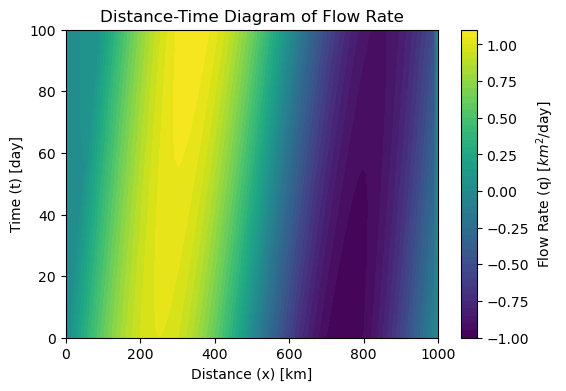

In [55]:
plt.figure(figsize=(6, 4))
X, T_grid = np.meshgrid(np.linspace(0, L, nx), np.linspace(0, T, nt))
plt.contourf(X, T_grid, q, levels=50, cmap="viridis")
plt.colorbar(label="Flow Rate (q) [$km^2$/day]")
plt.title("Distance-Time Diagram of Flow Rate")
plt.xlabel("Distance (x) [km]")
plt.ylabel("Time (t) [day]")
plt.show()

# Results

We simulated flow rate variations with respect to time, space, and both. We also explored how initial flow conditions affect flow rates. 

For the first code, where we kept the accumulation rate constant and used an exponential initial condition, we observed that the flow of ice increases over a certain distance, and then decreases before stabilizing at a constant rate. After reaching this steady state for a long distance, the flow decreases again. The shape of the lines remains consistent at each specific time, but we see a shift in their positions.

For the second code, we used the same conditions as before, but with a sine function for the initial conditions. This resulted in a sine curve-like flow graph, with a shift over time. We observed that the flow increases over some distance before decreasing, similar to the behavior of a sine curve. When the flow is positive, it indicates more snow falls, while negative values represent ablation, which means ice melts. 

In the third code, we simulated how the flow rate changes over time at specific distances. We observe that, for some distances, the flow rate increases over time, while for others, it decreases. However, the overall change in the flow rate is not very significant.

In the fourth code, we created a contour plot. where the flow rate is visualized over both distance and time. The x-axis represents the distance, the y-axis represents time, and the color variations indicate the values of the flow rate. The contour levels are filled with different colors according to the flow rate magnitude. In the plot, we observe that when the distance is around 200 km, the flow rate reaches its highest point as time increases. 

It is known that more accumulation occurs at higher altitudes (where the distance is smaller according to our x value, with x = 0 representing the highest altitude), and ablation happens at lower altitudes, meaning that as x increases, ablation occurs. In our model, we observe the same behavior when we use the exponential function as our initial value. However, for the sine initial value, we see the same behavior for some distance. After that, q increases, which was not expected.

It is a known that, in time-dependent models, ablation occurs more during the summer, while accumulation is higher during winter. However, in our model, we were unable to capture the effect of temperature. 

If the time step and grid spacing are too large, the model produces inaccurate results. When these values are smaller, the resulting graph is smoother, but the simulation takes more time. Using a second-order differential model would provide more realistic results. Increasing the accumulation constant leads to a significant shift between the curves. On the other hand, increasing the glacier length while keeping other parameters constant results in less noticeable shifts between the curves.

The model shows how glacier flow changes over distance and time, and identifies regions of accumulation (positive q) and ablation (negative q). 

We could use higher order differential equations to model, use small step size, more realistic boundary conditions, including how temperature may change glacier dynamics, and use realistic equations to describe accumulation rather than using constant terms. 

# References

1. Licciulli C, Bohleber P, Lier J, Gagliardini O, Hoelzle M, Eisen O. A full Stokes ice-flow model to assist the interpretation of millennial-scale ice cores at the high-Alpine drilling site Colle Gnifetti, Swiss/Italian Alps. Journal of Glaciology. 2020;66(255):35-48. doi:10.1017/jog.2019.82
2. https://www.antarcticglaciers.org/glacier-processes/mass-balance/glacier-accumulation-and-ablation/ 
3. Nye, John Frederick. “The response of glaciers and ice-sheets to seasonal and climatic changes.” Proceedings of the Royal Society of London. Series A. Mathematical and Physical Sciences 256 (1960): 559 - 584. 